In [1]:
import pandas as pd
df=pd.read_csv("/content/world cup.csv")
print(df)

     Year              Datetime                     Stage  \
0    1930  13 Jul 1930 - 15:00                    Group 1   
1    1930  13 Jul 1930 - 15:00                    Group 4   
2    1930  14 Jul 1930 - 12:45                    Group 2   
3    1930  14 Jul 1930 - 14:50                    Group 3   
4    1930  15 Jul 1930 - 16:00                    Group 1   
..    ...                   ...                       ...   
847  2014  05 Jul 2014 - 17:00             Quarter-finals   
848  2014  08 Jul 2014 - 17:00                Semi-finals   
849  2014  09 Jul 2014 - 17:00                Semi-finals   
850  2014  12 Jul 2014 - 17:00   Play-off for third place   
851  2014  13 Jul 2014 - 16:00                      Final   

                 Stadium             City Home Team Name  Home Team Goals  \
0                Pocitos      Montevideo          France                4   
1         Parque Central      Montevideo             USA                3   
2         Parque Central      Montev

In [2]:
# Number of rows and columns
num_rows, num_columns = df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 852
Number of columns: 20


In [3]:
# Column names
column_names = df.columns
print("Column names:")
for column in column_names:
    print(column)

Column names:
Year
Datetime
Stage
Stadium
City
Home Team Name
Home Team Goals
Away Team Goals
Away Team Name
Win conditions
Attendance
Half-time Home Goals
Half-time Away Goals
Referee
Assistant 1
Assistant 2
RoundID
MatchID
Home Team Initials
Away Team Initials


In [4]:
# Slicing specific range (rows 1 to 3)
specific_range = df[1:4]  # Slicing from row index 1 to 3 (inclusive of start, exclusive of end)
print("Specific range (rows 1 to 3):")
print(specific_range)

Specific range (rows 1 to 3):
   Year              Datetime    Stage         Stadium         City  \
1  1930  13 Jul 1930 - 15:00   Group 4  Parque Central  Montevideo    
2  1930  14 Jul 1930 - 12:45   Group 2  Parque Central  Montevideo    
3  1930  14 Jul 1930 - 14:50   Group 3         Pocitos  Montevideo    

  Home Team Name  Home Team Goals  Away Team Goals Away Team Name  \
1            USA                3                0        Belgium   
2     Yugoslavia                2                1         Brazil   
3        Romania                3                1           Peru   

  Win conditions  Attendance  Half-time Home Goals  Half-time Away Goals  \
1                    18346.0                     2                     0   
2                    24059.0                     2                     0   
3                     2549.0                     1                     0   

                 Referee               Assistant 1               Assistant 2  \
1      MACIAS Jose (ARG

In [6]:
# Summary statistics
summary_statistics = df.describe()
print("Summary statistics:")
print(summary_statistics)

Summary statistics:
              Year  Home Team Goals  Away Team Goals     Attendance  \
count   852.000000       852.000000       852.000000     850.000000   
mean   1985.089202         1.811033         1.022300   45164.800000   
std      22.448825         1.610255         1.087573   23485.249247   
min    1930.000000         0.000000         0.000000    2000.000000   
25%    1970.000000         1.000000         0.000000   30000.000000   
50%    1990.000000         2.000000         1.000000   41579.500000   
75%    2002.000000         3.000000         2.000000   61374.500000   
max    2014.000000        10.000000         7.000000  173850.000000   

       Half-time Home Goals  Half-time Away Goals       RoundID       MatchID  
count            852.000000            852.000000  8.520000e+02  8.520000e+02  
mean               0.708920              0.428404  1.066177e+07  6.134687e+07  
std                0.937414              0.691252  2.729613e+07  1.110572e+08  
min                0

In [8]:
# i) Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# ii) Replace missing numerical values
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    if df[column].isnull().any():
        # Replace with mean
        df[column].fillna(df[column].mean(), inplace=True)
        # Or replace with median
        # df[column].fillna(df[column].median(), inplace=True)

print("\nData after replacing missing values:")
print(df)

Missing values in each column:
Year                    0
Datetime                0
Stage                   0
Stadium                 0
City                    0
Home Team Name          0
Home Team Goals         0
Away Team Goals         0
Away Team Name          0
Win conditions          0
Attendance              2
Half-time Home Goals    0
Half-time Away Goals    0
Referee                 0
Assistant 1             0
Assistant 2             0
RoundID                 0
MatchID                 0
Home Team Initials      0
Away Team Initials      0
dtype: int64

Data after replacing missing values:
     Year              Datetime                     Stage  \
0    1930  13 Jul 1930 - 15:00                    Group 1   
1    1930  13 Jul 1930 - 15:00                    Group 4   
2    1930  14 Jul 1930 - 12:45                    Group 2   
3    1930  14 Jul 1930 - 14:50                    Group 3   
4    1930  15 Jul 1930 - 16:00                    Group 1   
..    ...                   ... 

In [18]:
pip install pandas seaborn matplotlib

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

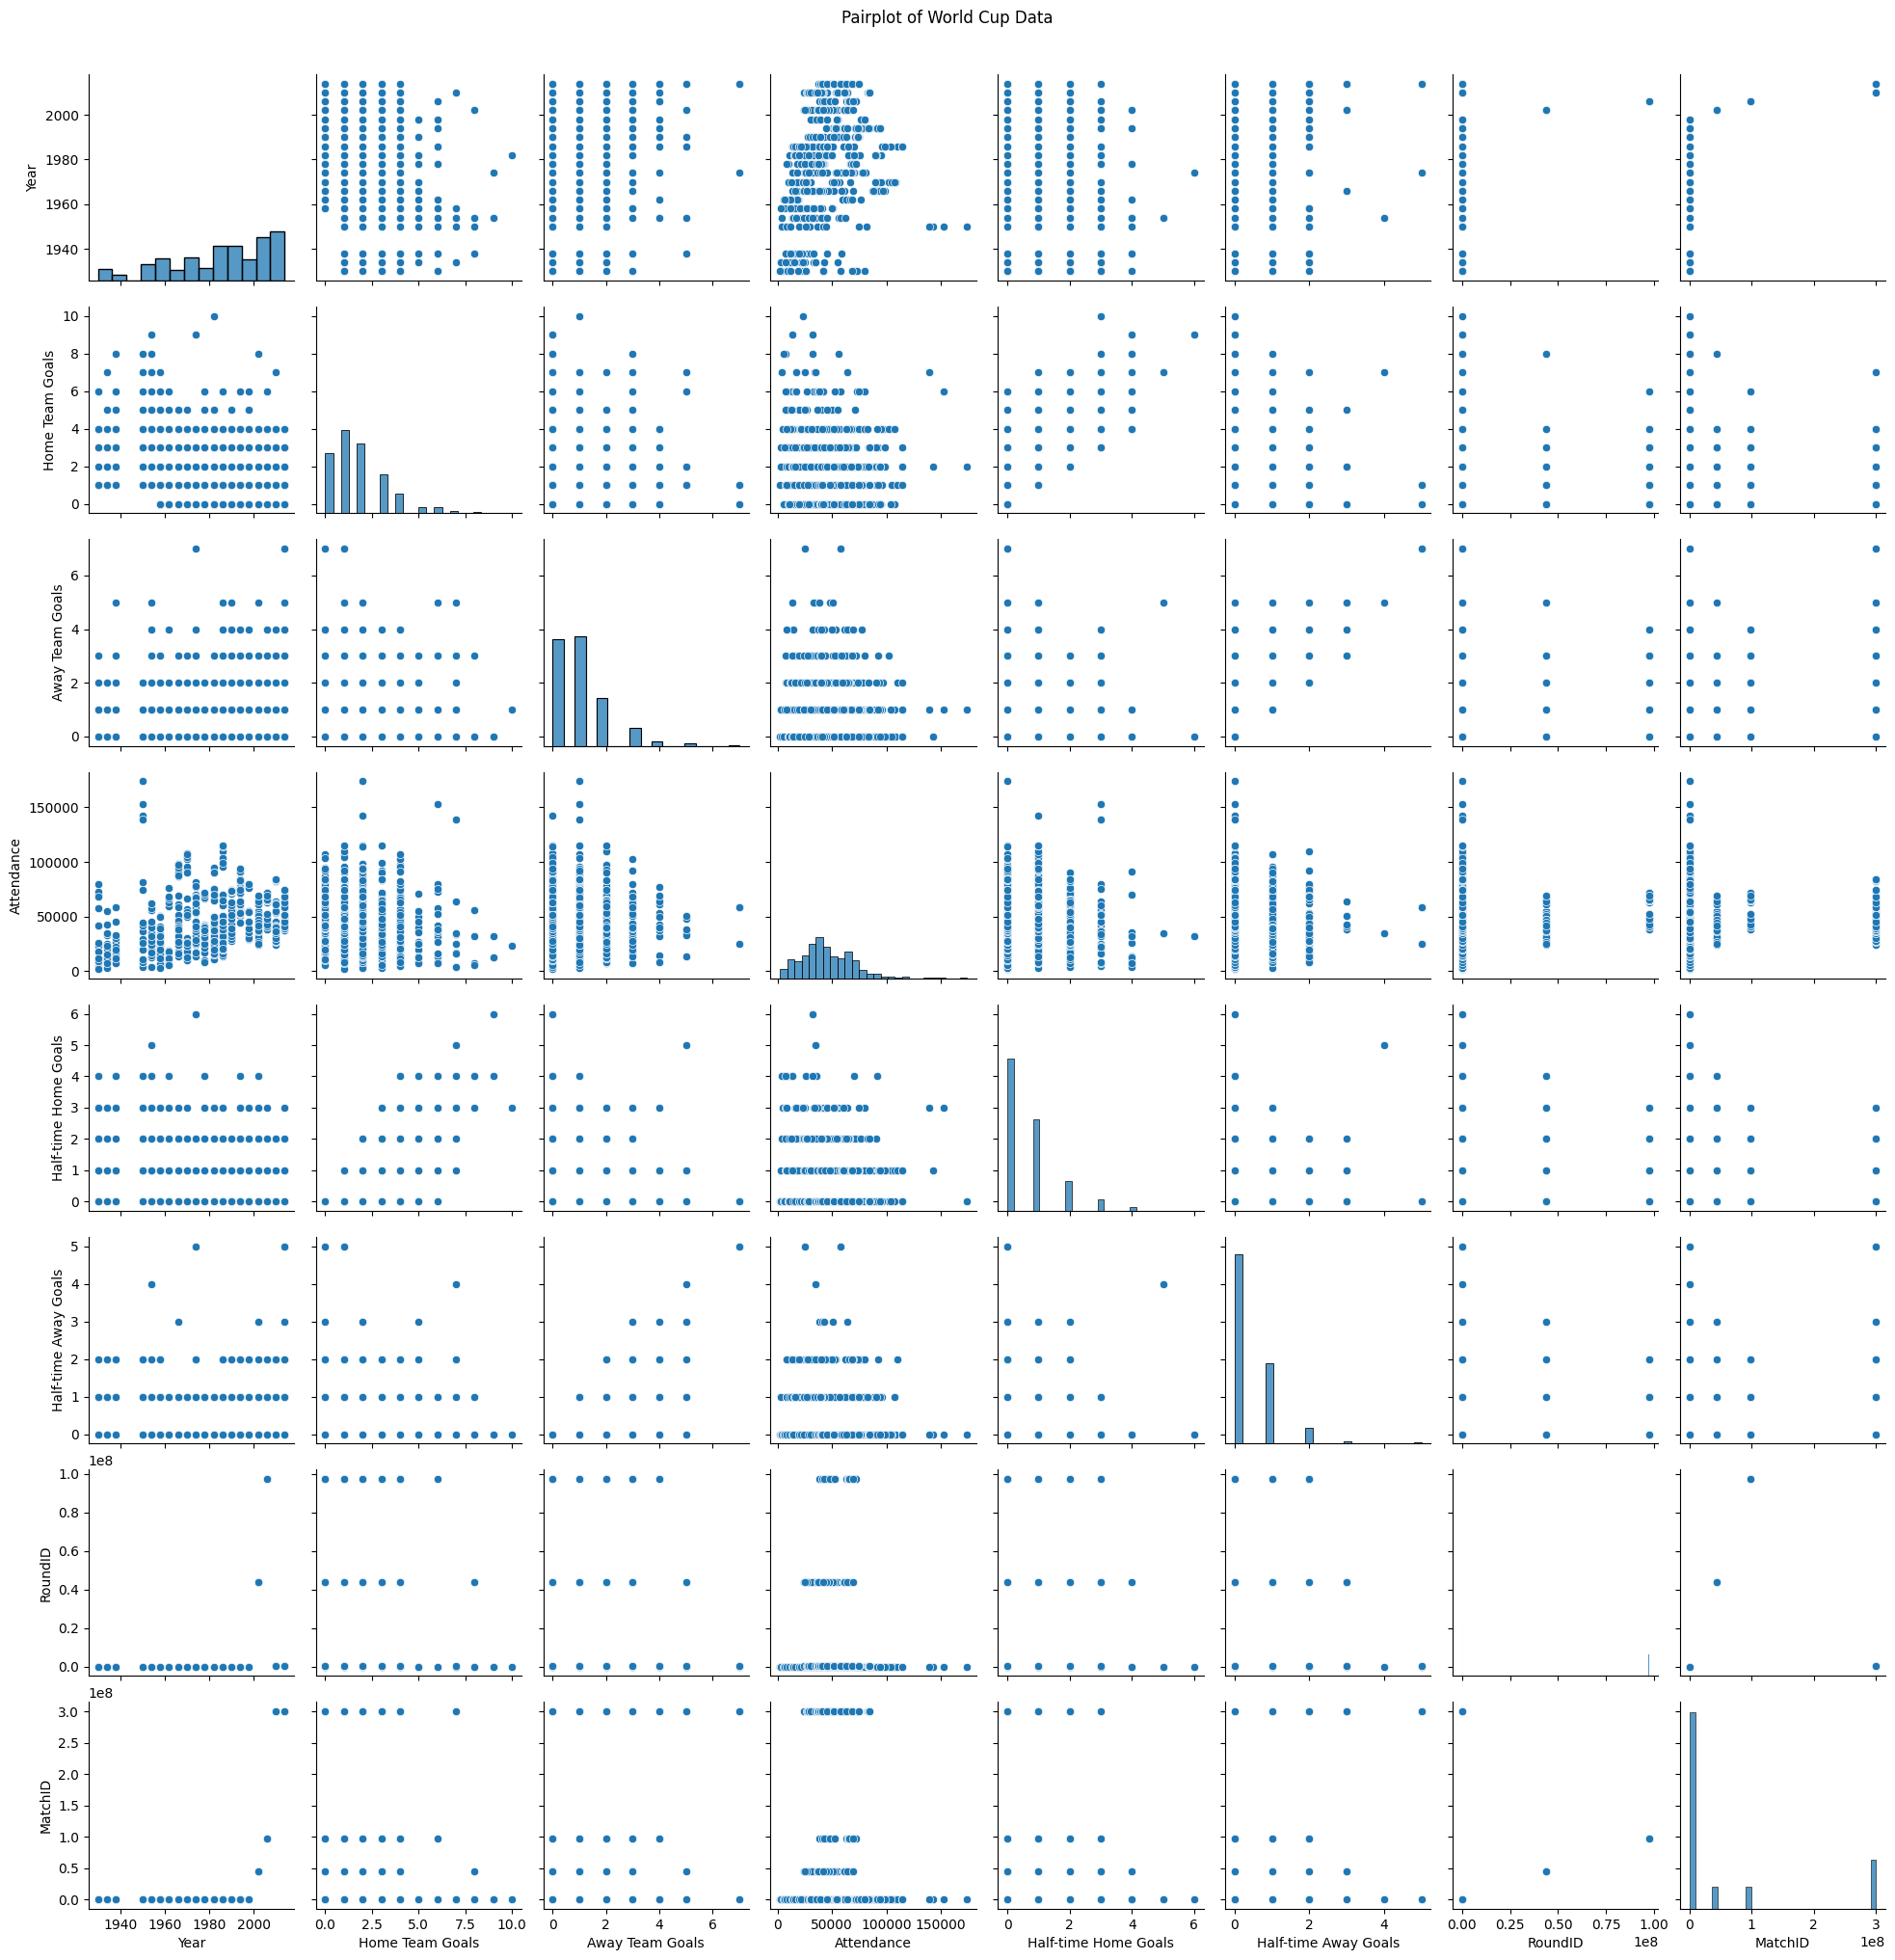

In [28]:
# i) Pairplot
sns.pairplot(df)
plt.suptitle('Pairplot of World Cup Data', y=1.02)
plt.show()

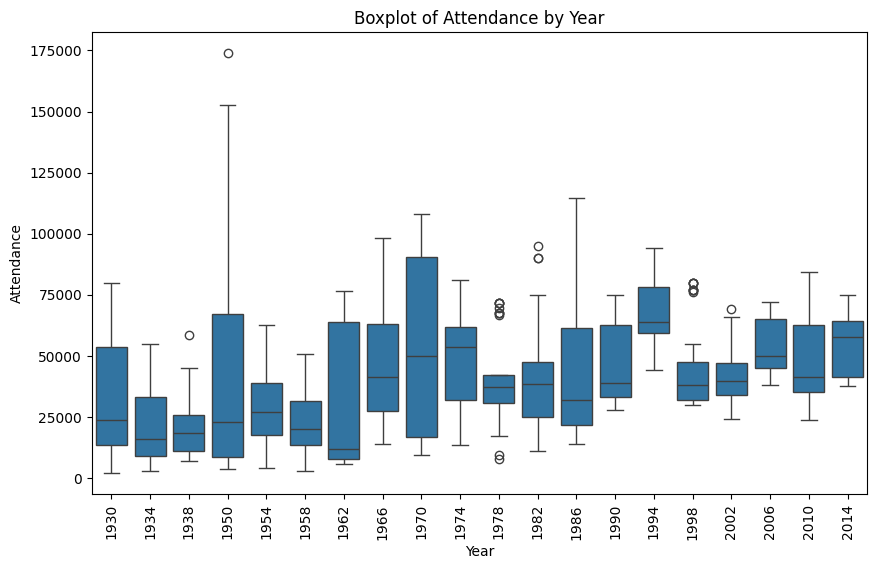

In [48]:
# ii) Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='Attendance', data=df)  # Changed 'attendence' to 'Attendance'
plt.title('Boxplot of Attendance by Year')
plt.xticks(rotation=90)
plt.show()

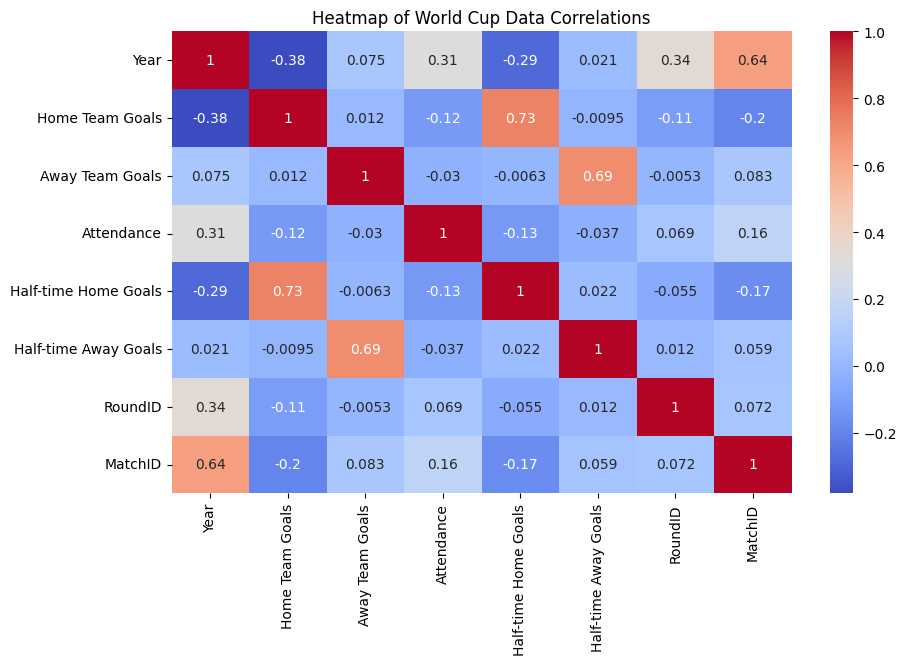

In [42]:
# iii) Heatmap
plt.figure(figsize=(10, 6))
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of World Cup Data Correlations')
plt.show()


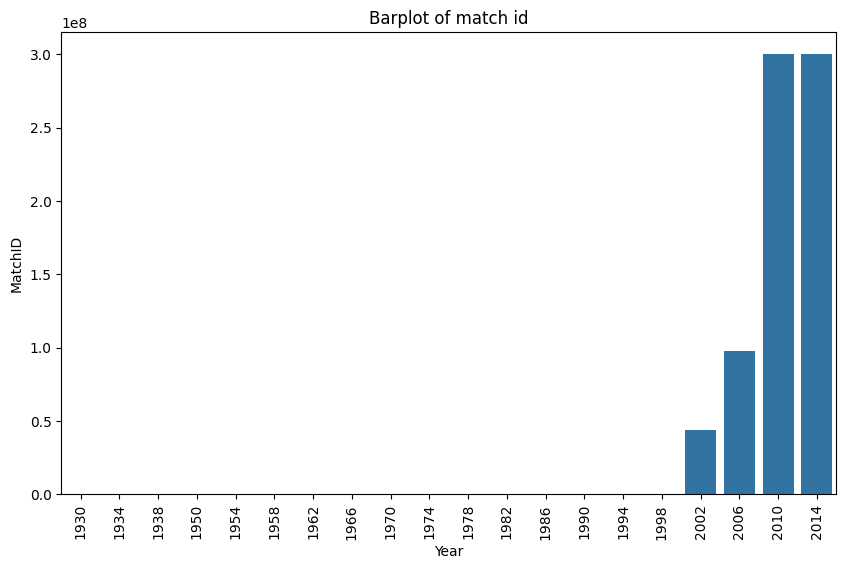

In [69]:
# iv) Barplot
plt.figure(figsize=(10, 6))
# Verify the correct column name for 'match id' in your DataFrame
# and replace 'MatchID' below with the correct name
sns.barplot(x='Year', y='MatchID', data=df)
plt.title('Barplot of match id')
plt.xticks(rotation=90)
plt.show()

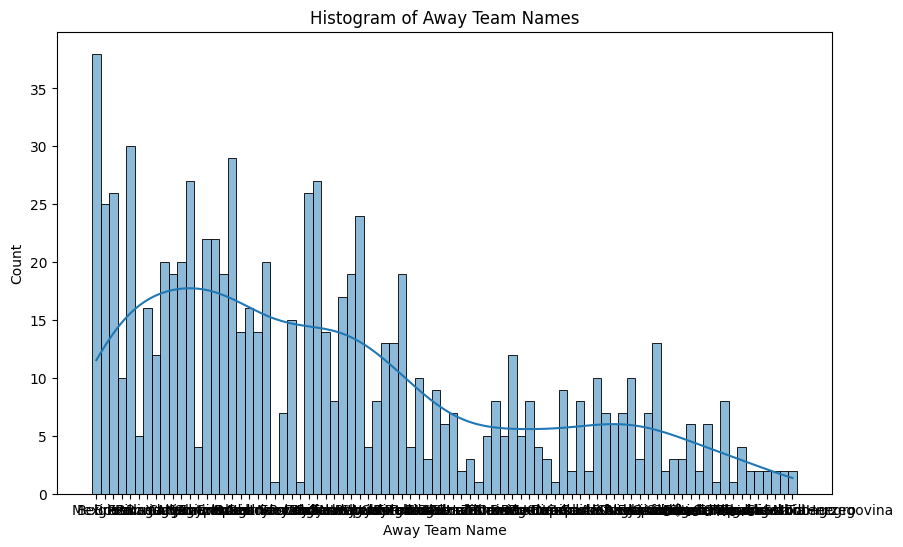

In [53]:
# v) Histogram
plt.figure(figsize=(10, 6))
# Verify the correct column name for 'Away team name' in your DataFrame
# Replace 'Away Team Name' with the actual column name if it's different
sns.histplot(df['Away Team Name'], bins=10, kde=True)
plt.title('Histogram of Away Team Names')
plt.show()

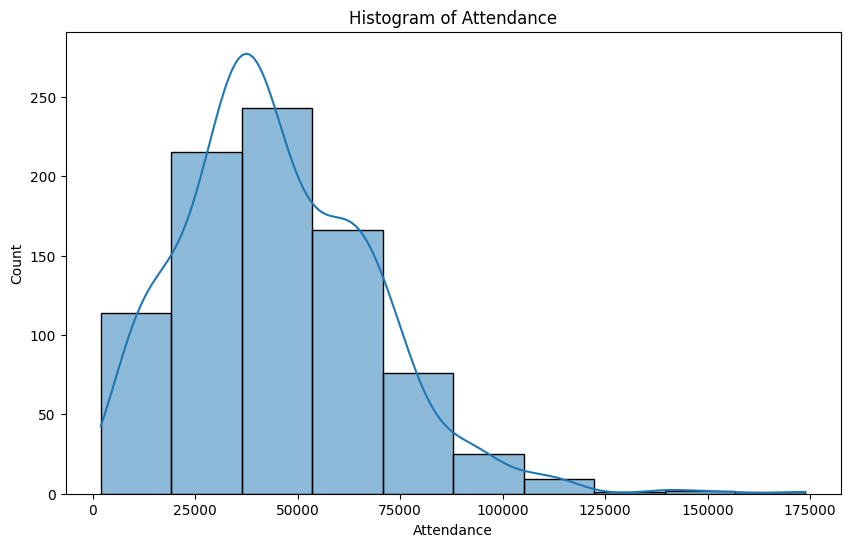

In [51]:
# v) Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Attendance'], bins=10, kde=True) # Changed 'attendence' to 'Attendance'
plt.title('Histogram of Attendance') # Changed title to reflect correct column name
plt.show()

<ipython-input-59-6008fc6c32ad>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Attendance'], shade=True)  # Corrected column name to 'Attendance'


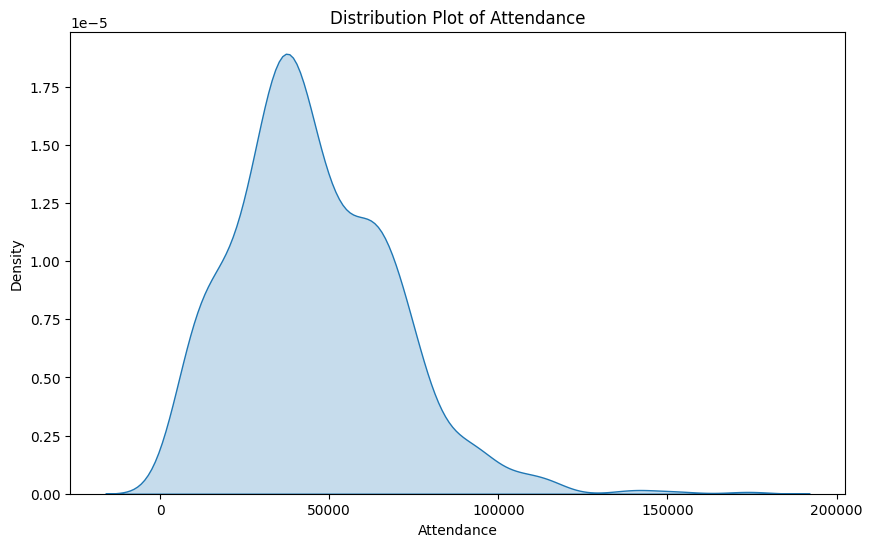

In [59]:
# vi) Distribution plot
plt.figure(figsize=(10, 6))
# Replace 'Attendance' with the actual column name from your DataFrame if different.
sns.kdeplot(df['Attendance'], shade=True)  # Corrected column name to 'Attendance'
plt.title('Distribution Plot of Attendance') # Corrected title to match
plt.show()

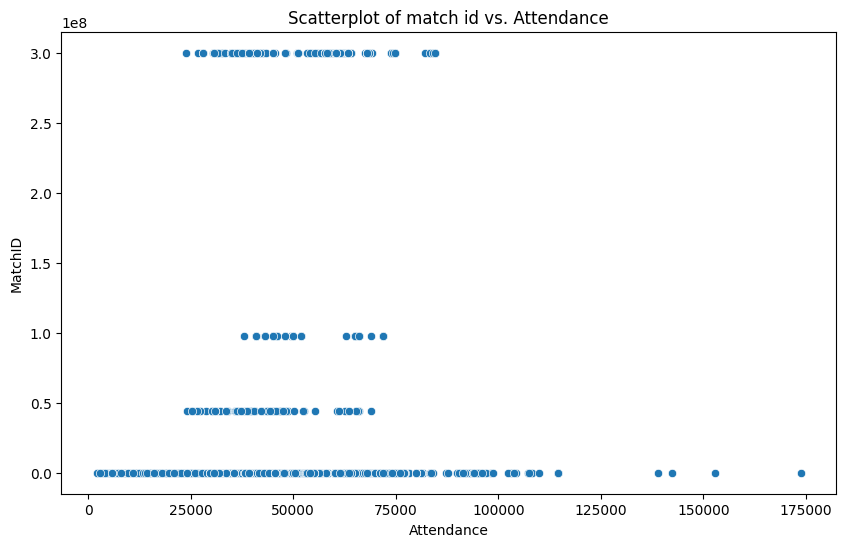

In [72]:
# vii) Scatterplot
plt.figure(figsize=(10, 6))
# Correct the column names to match your DataFrame
sns.scatterplot(x='Attendance', y='MatchID', data=df)
plt.title('Scatterplot of match id vs. Attendance')
plt.show()